In [24]:
import pm4py
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pickle
import numpy as np
import tqdm
import seaborn as sns
from project_functions import *
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator


In [4]:
log_df = None
with open("data/log_df_filtered.pkl", "rb") as f:
    log_df = pickle.load(f)

print("We have",len(log_df['case:concept:name'].unique()),"cases")

We have 130883 cases


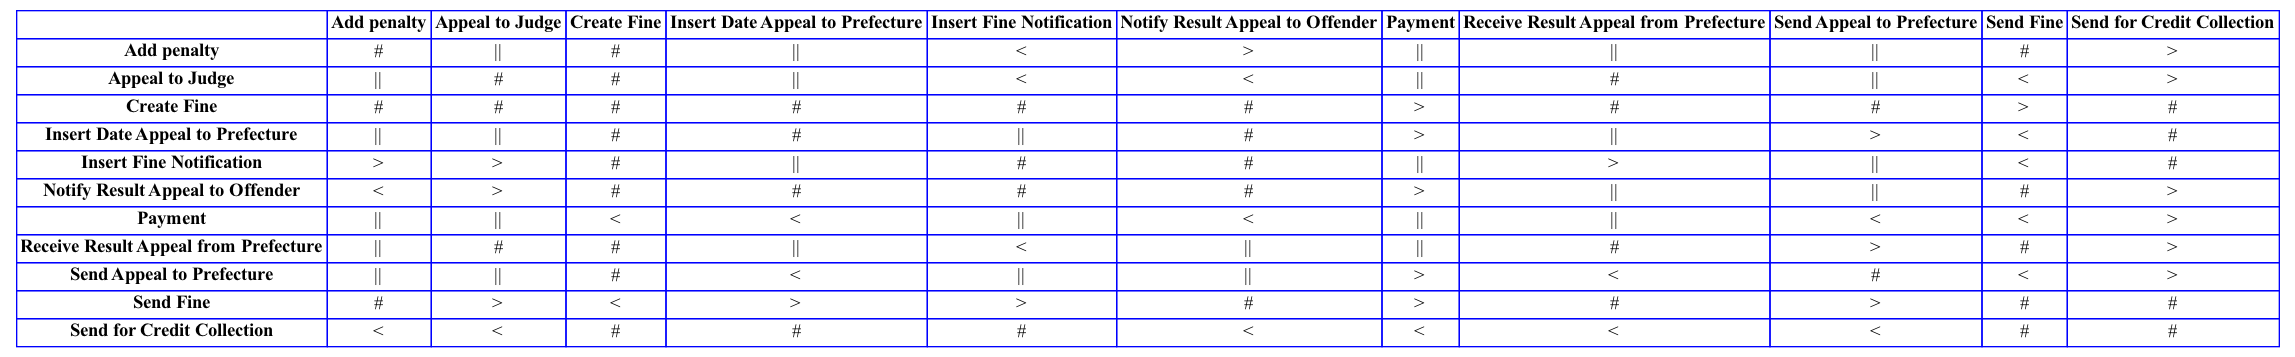

In [5]:
footprints = pm4py.discover_footprints(log_df)
pm4py.view_footprints(footprints, format='png')

# Direct follow graph

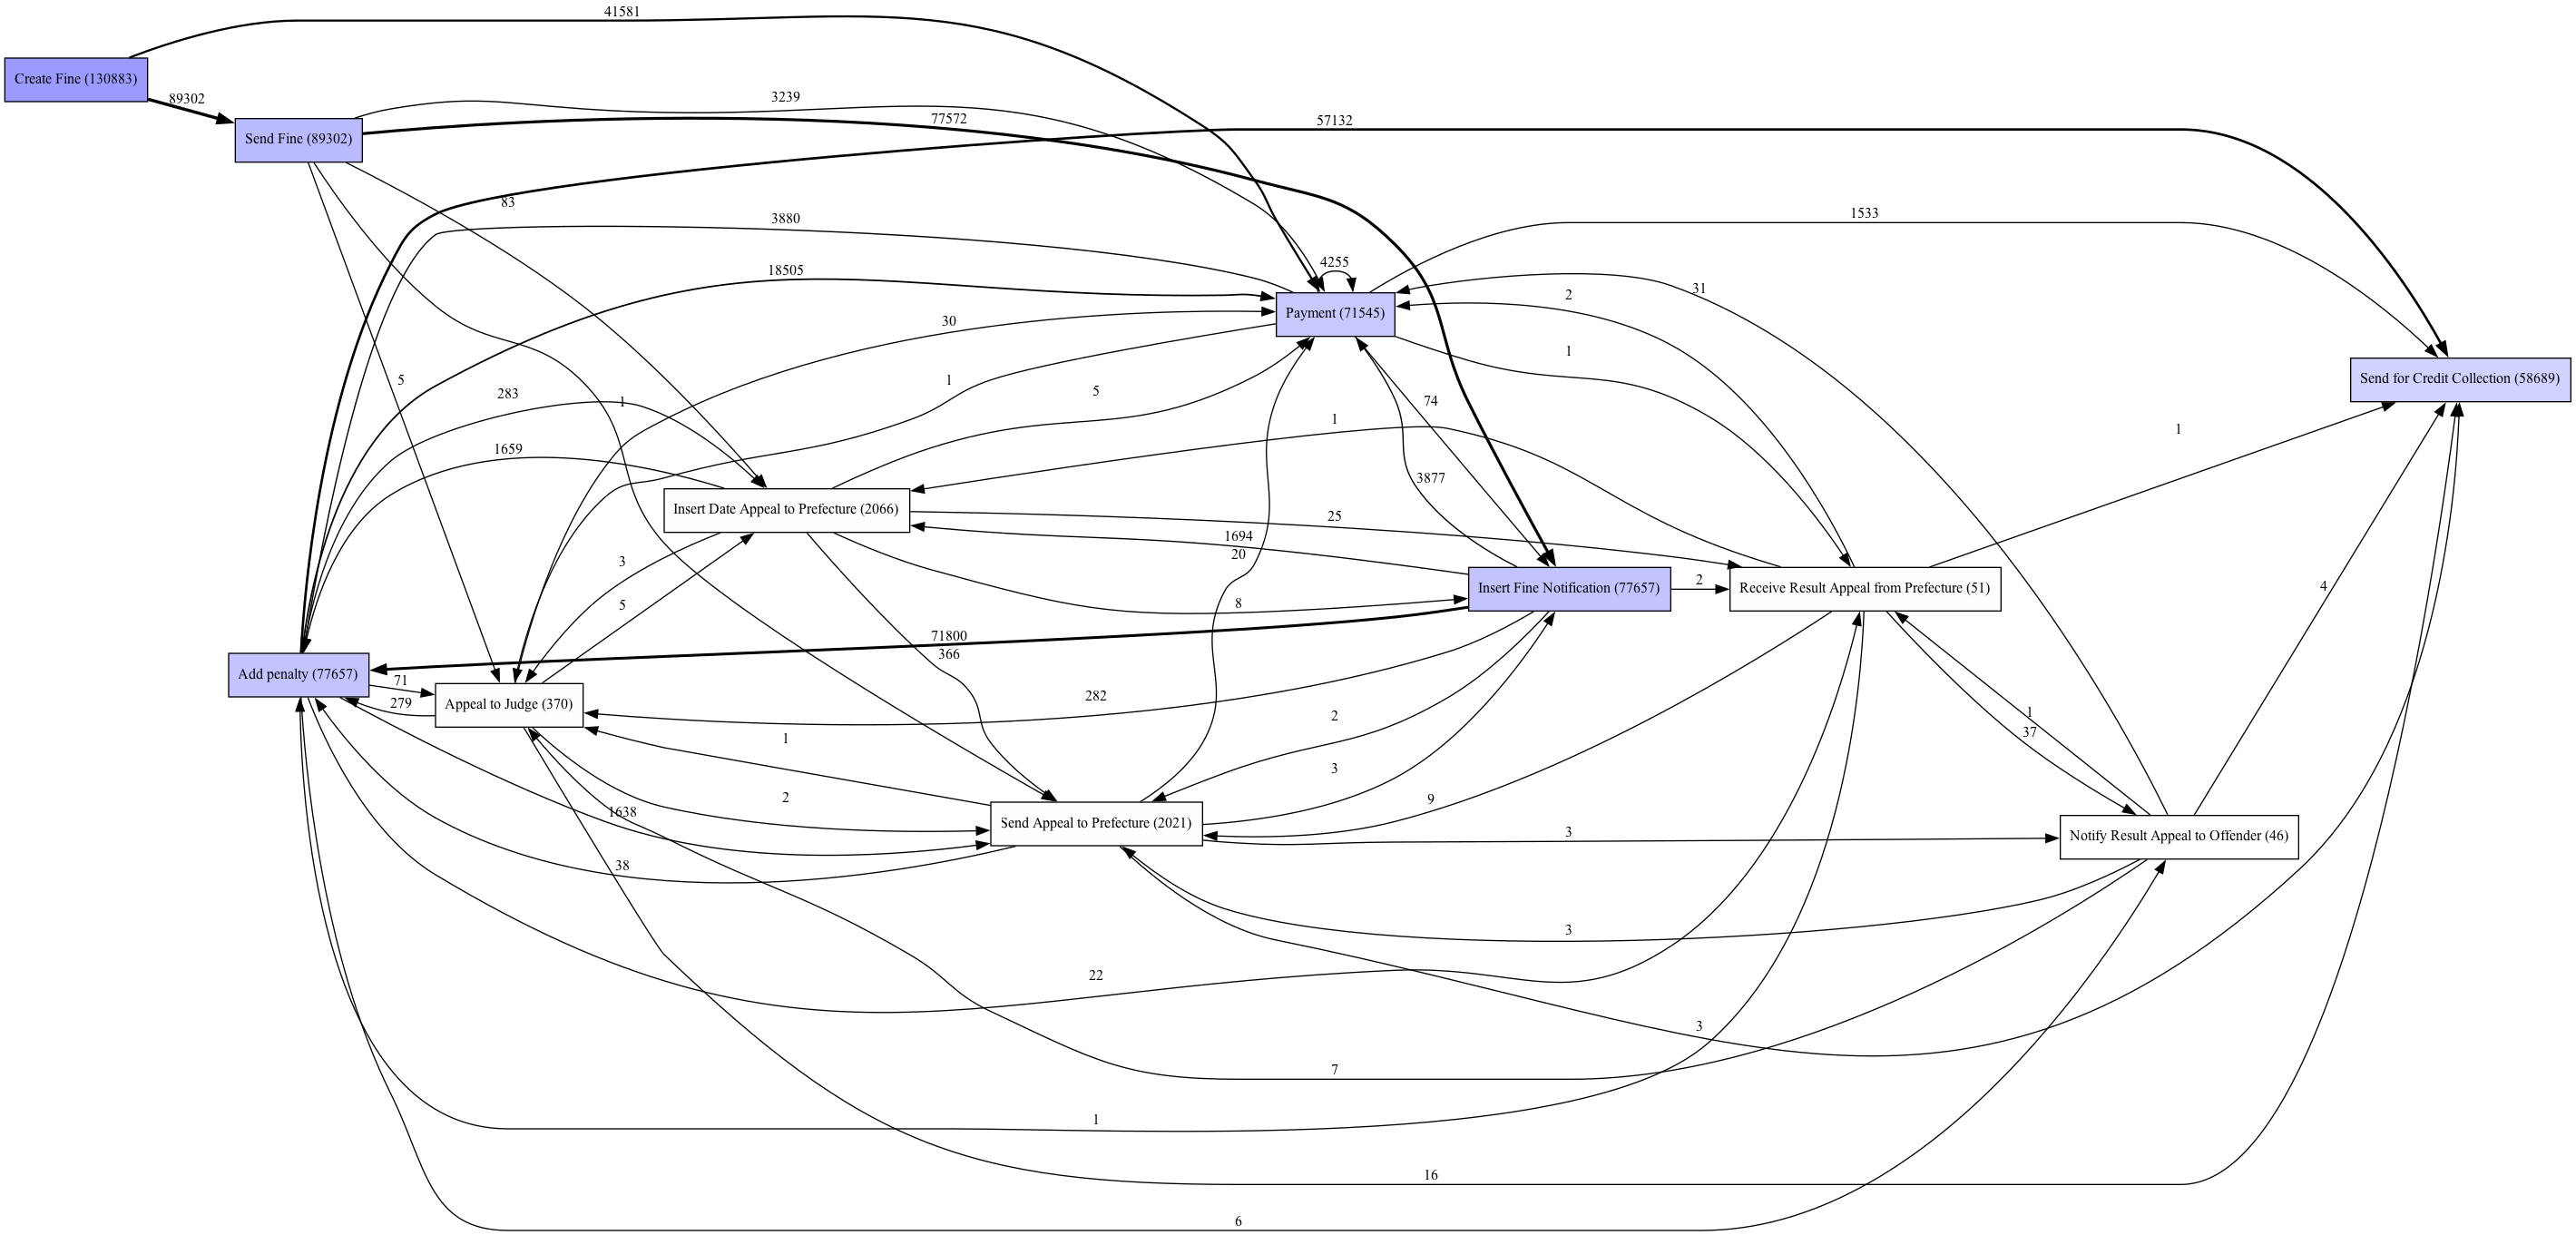

In [7]:

dfg = dfg_discovery.apply(log_df)

gviz = dfg_visualization.apply(dfg, log=log_df, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

# Alpha miner

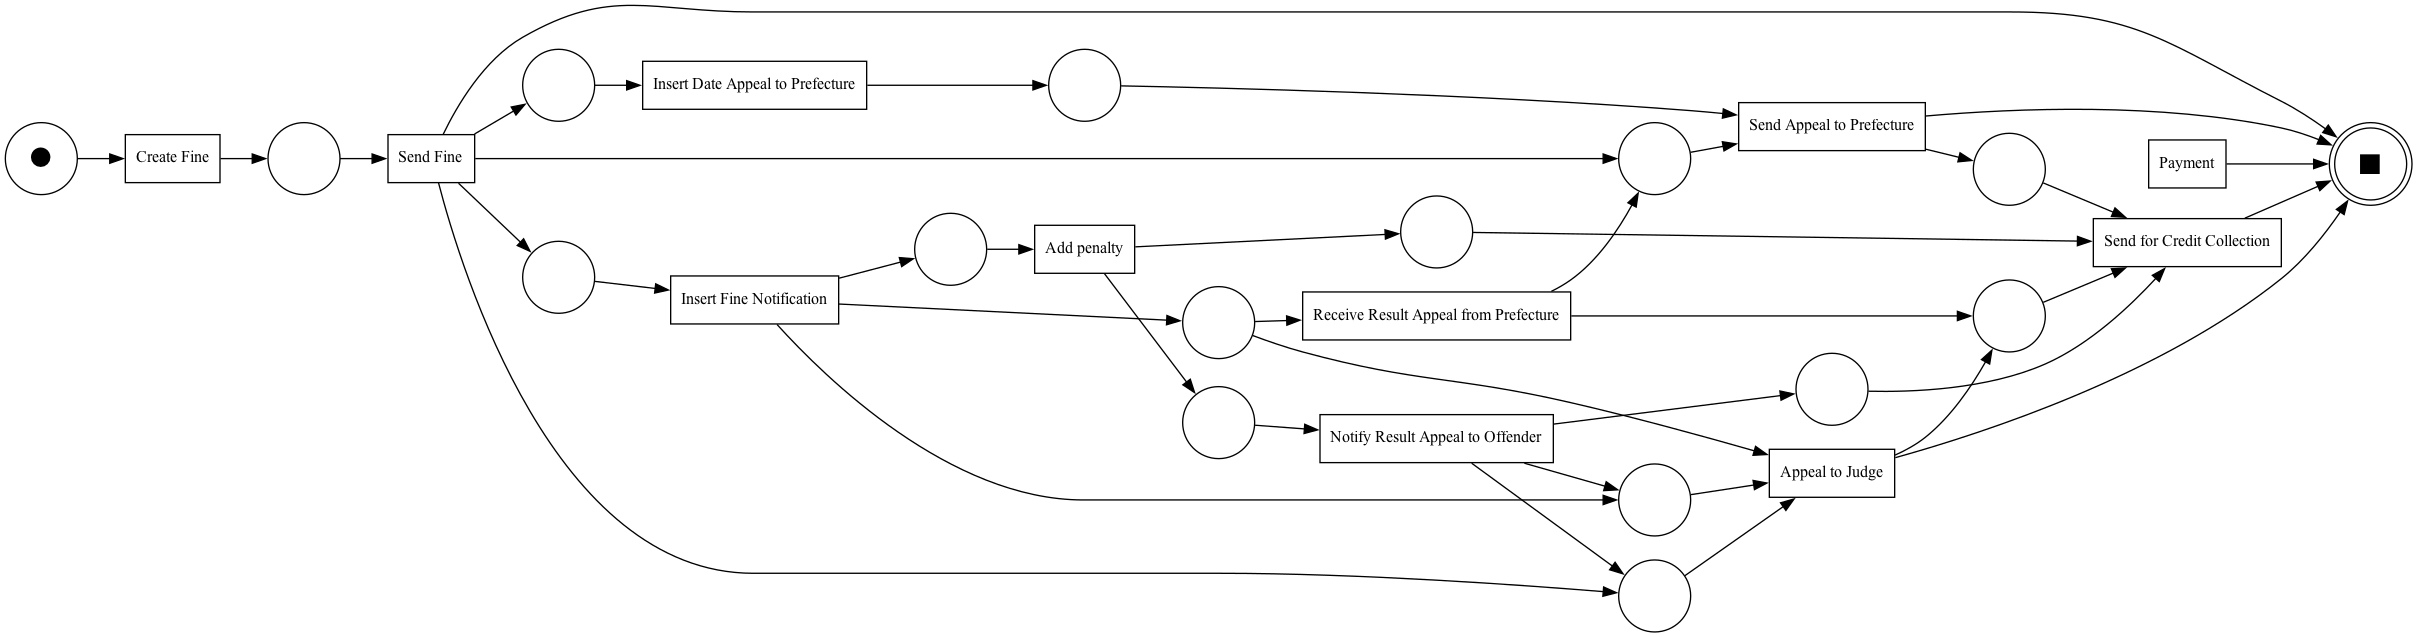

In [8]:
net_alpha, im_alpha, fm_alpha = pm4py.discover_petri_net_alpha(log_df)

pm4py.view_petri_net(net_alpha, im_alpha, fm_alpha, format='png')

## Reply technique

In [23]:
precision_tbr= pm4py.precision_token_based_replay(log_df,net_alpha,im_alpha,fm_alpha)
print("Precision: ",precision_tbr)
fitness_tbr= pm4py.fitness_token_based_replay(log_df,net_alpha,im_alpha,fm_alpha)
print("Recall: ",fitness_tbr)

simp = simplicity_evaluator.apply(net_alpha)
print("Simplicity: ",simp)

gen = generalization_evaluator.apply(log_df, net_alpha, im_alpha, fm_alpha)
print("Generalization: ",gen)



replaying log with TBR, completed traces :: 100%|██████████| 158/158 [00:00<00:00, 3340.51it/s]


Precision:  0.7642643806551442


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:01<00:00, 97.69it/s]

Recall:  {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.6813356404110867, 'log_fitness': 0.614467138848865, 'percentage_of_fitting_traces': 0.0}
Simplicity:  0.5294117647058824


## Alignment technique

In [32]:
alignments_diagnostics = pm4py.conformance_diagnostics_alignments(log_df, net_alpha, im_alpha, fm_alpha, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
print(alignments_diagnostics)

Exception: trying to apply alignments on a Petri net that is not a easy sound net!!

# Inductive miner algorithm

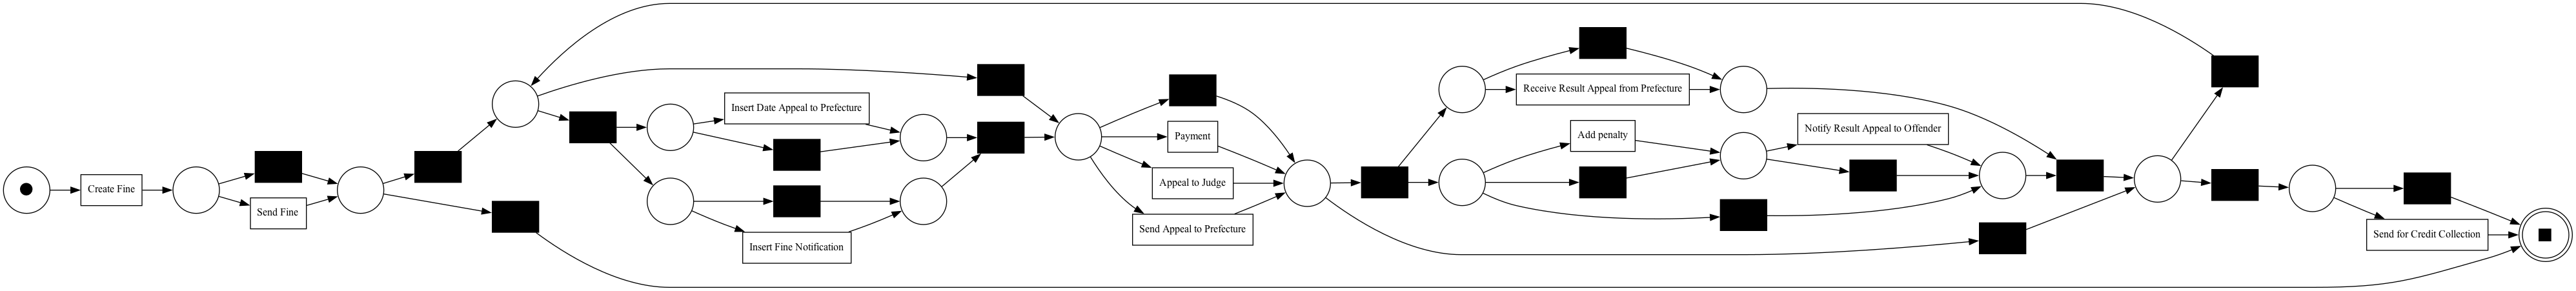

In [34]:
net_ind, im_ind, fm_ind = pm4py.discover_petri_net_inductive(log_df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net_ind, im_ind, fm_ind, format='png')

## Replay technique

In [35]:
precision_tbr= pm4py.precision_token_based_replay(log_df,net_ind,im_ind,fm_ind)
print("Precision: ",precision_tbr)
fitness_tbr= pm4py.fitness_token_based_replay(log_df,net_ind,im_ind,fm_ind)
print("Recall: ",fitness_tbr)

simp = simplicity_evaluator.apply(net_ind)
print("Simplicity: ",simp)

gen = generalization_evaluator.apply(log_df, net_ind, im_ind, fm_ind)
print("Generalization: ",gen)

replaying log with TBR, completed traces :: 100%|██████████| 158/158 [00:00<00:00, 797.38it/s]


Precision:  0.504877452225279


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:01<00:00, 97.70it/s]


Recall:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Simplicity:  0.6000000000000001


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:01<00:00, 98.75it/s]


Generalization:  0.9640981617674659


## Alignment technique

In [38]:
alignments_diagnostics = pm4py.conformance_diagnostics_alignments(log_df, net_ind, im_ind, fm_ind, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
print(alignments_diagnostics[0])

#metrics of aligment
print("Alignment metrics")


aligning log, completed variants :: 100%|██████████| 108/108 [00:00<00:00, 246.20it/s]

{'alignment': [('Create Fine', 'Create Fine'), ('Send Fine', 'Send Fine'), ('>>', None), ('>>', None), ('>>', None), ('Insert Fine Notification', 'Insert Fine Notification'), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('Add penalty', 'Add penalty'), ('>>', None), ('>>', None), ('>>', None), ('Send for Credit Collection', 'Send for Credit Collection')], 'cost': 10, 'visited_states': 15, 'queued_states': 57, 'traversed_arcs': 57, 'lp_solved': 3, 'fitness': 1.0, 'bwc': 60002}


In [48]:
fitness_alignments = pm4py.fitness_alignments(log_df, net_ind, im_ind, fm_ind, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
print("Fitness: ",fitness_alignments)

aligning log, completed variants :: 100%|██████████| 108/108 [00:00<00:00, 255.89it/s]

Fitness:  {'percFitTraces': 100.0, 'averageFitness': 1.0, 'percentage_of_fitting_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 0.9998223113234952}


# Heuristic miner

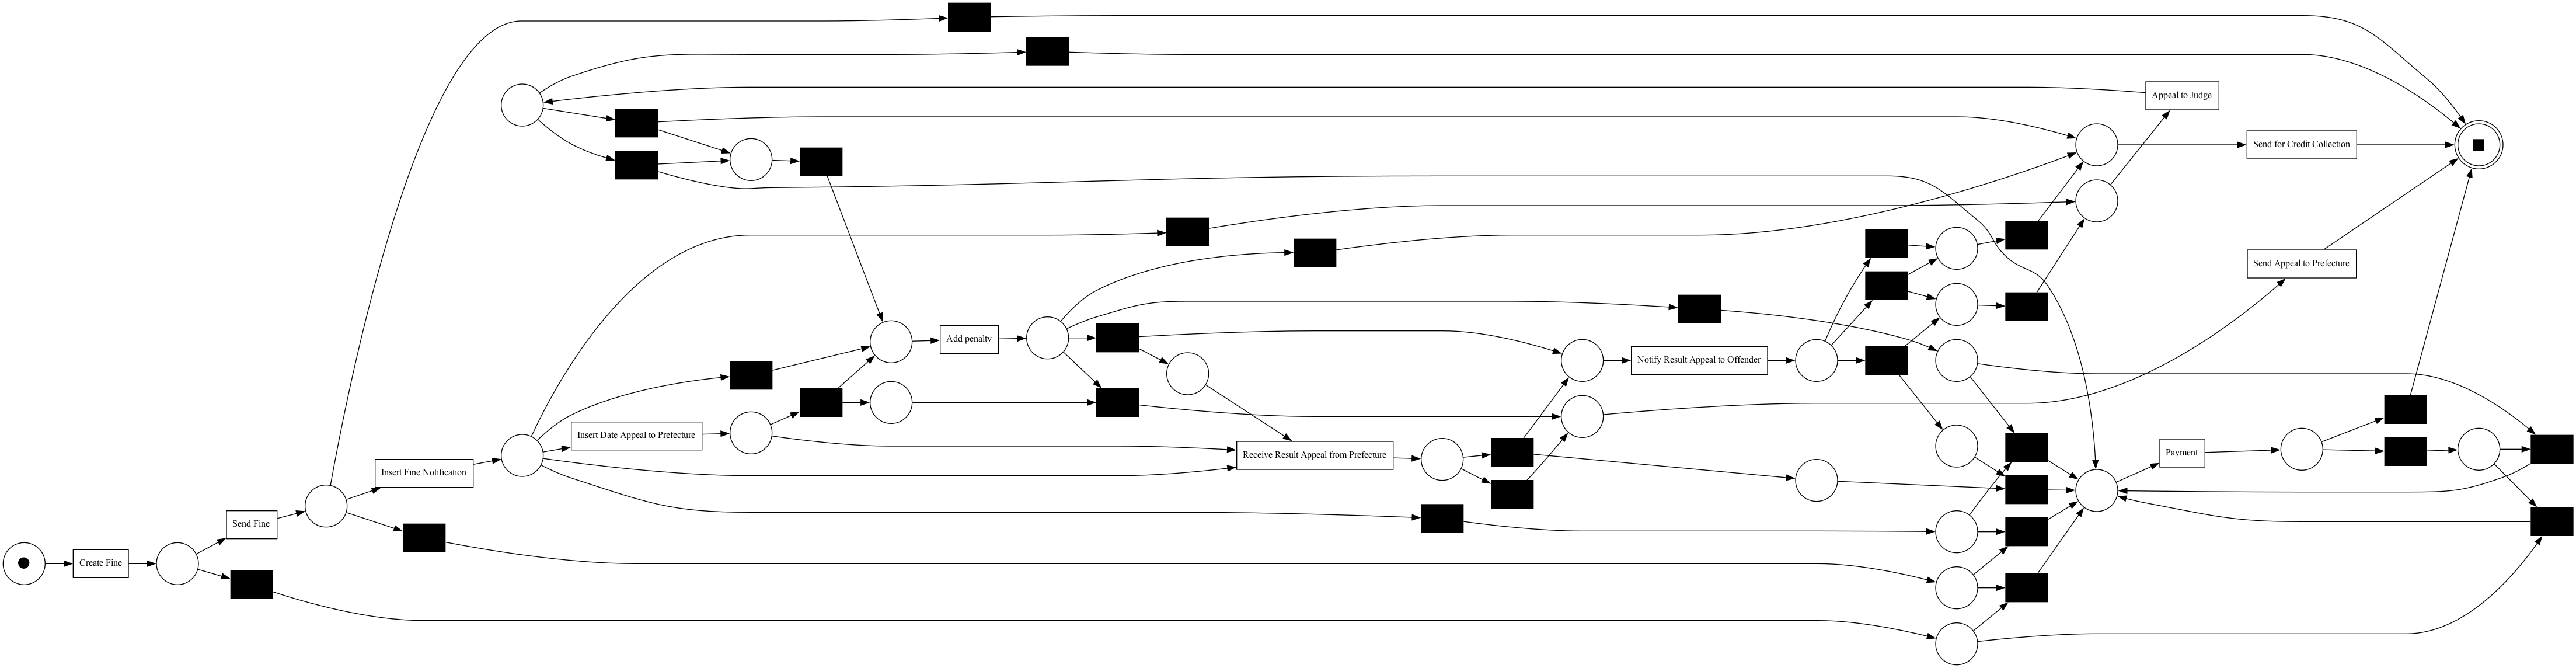

In [10]:
net_heu, im_heu, fm_heu = pm4py.discover_petri_net_heuristics(log_df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net_heu, im_heu, fm_heu, format='png')

In [26]:
precision_tbr= pm4py.precision_token_based_replay(log_df,net_heu,im_heu,fm_heu)
print("Precision: ",precision_tbr)
fitness_tbr= pm4py.fitness_token_based_replay(log_df,net_heu,im_heu,fm_heu)
print("Recall: ",fitness_tbr)

simp = simplicity_evaluator.apply(net_heu)
print("Simplicity: ",simp)

gen = generalization_evaluator.apply(log_df, net_heu, im_heu, fm_heu)
print("Generalization: ",gen)

replaying log with TBR, completed traces :: 100%|██████████| 158/158 [00:00<00:00, 2796.80it/s]


Precision:  0.9962209488834087


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:01<00:00, 97.84it/s]


Recall:  {'perc_fit_traces': 50.829366686277055, 'average_trace_fitness': 0.9158004615375754, 'log_fitness': 0.9285198785095491, 'percentage_of_fitting_traces': 50.829366686277055}
Simplicity:  0.5555555555555556


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:01<00:00, 96.91it/s]


Generalization:  0.8059534931724667


# ILP miner

discovering Petri net using ILP miner, completed causal relations :: 100%|██████████| 29/29 [00:00<00:00, 401.94it/s]


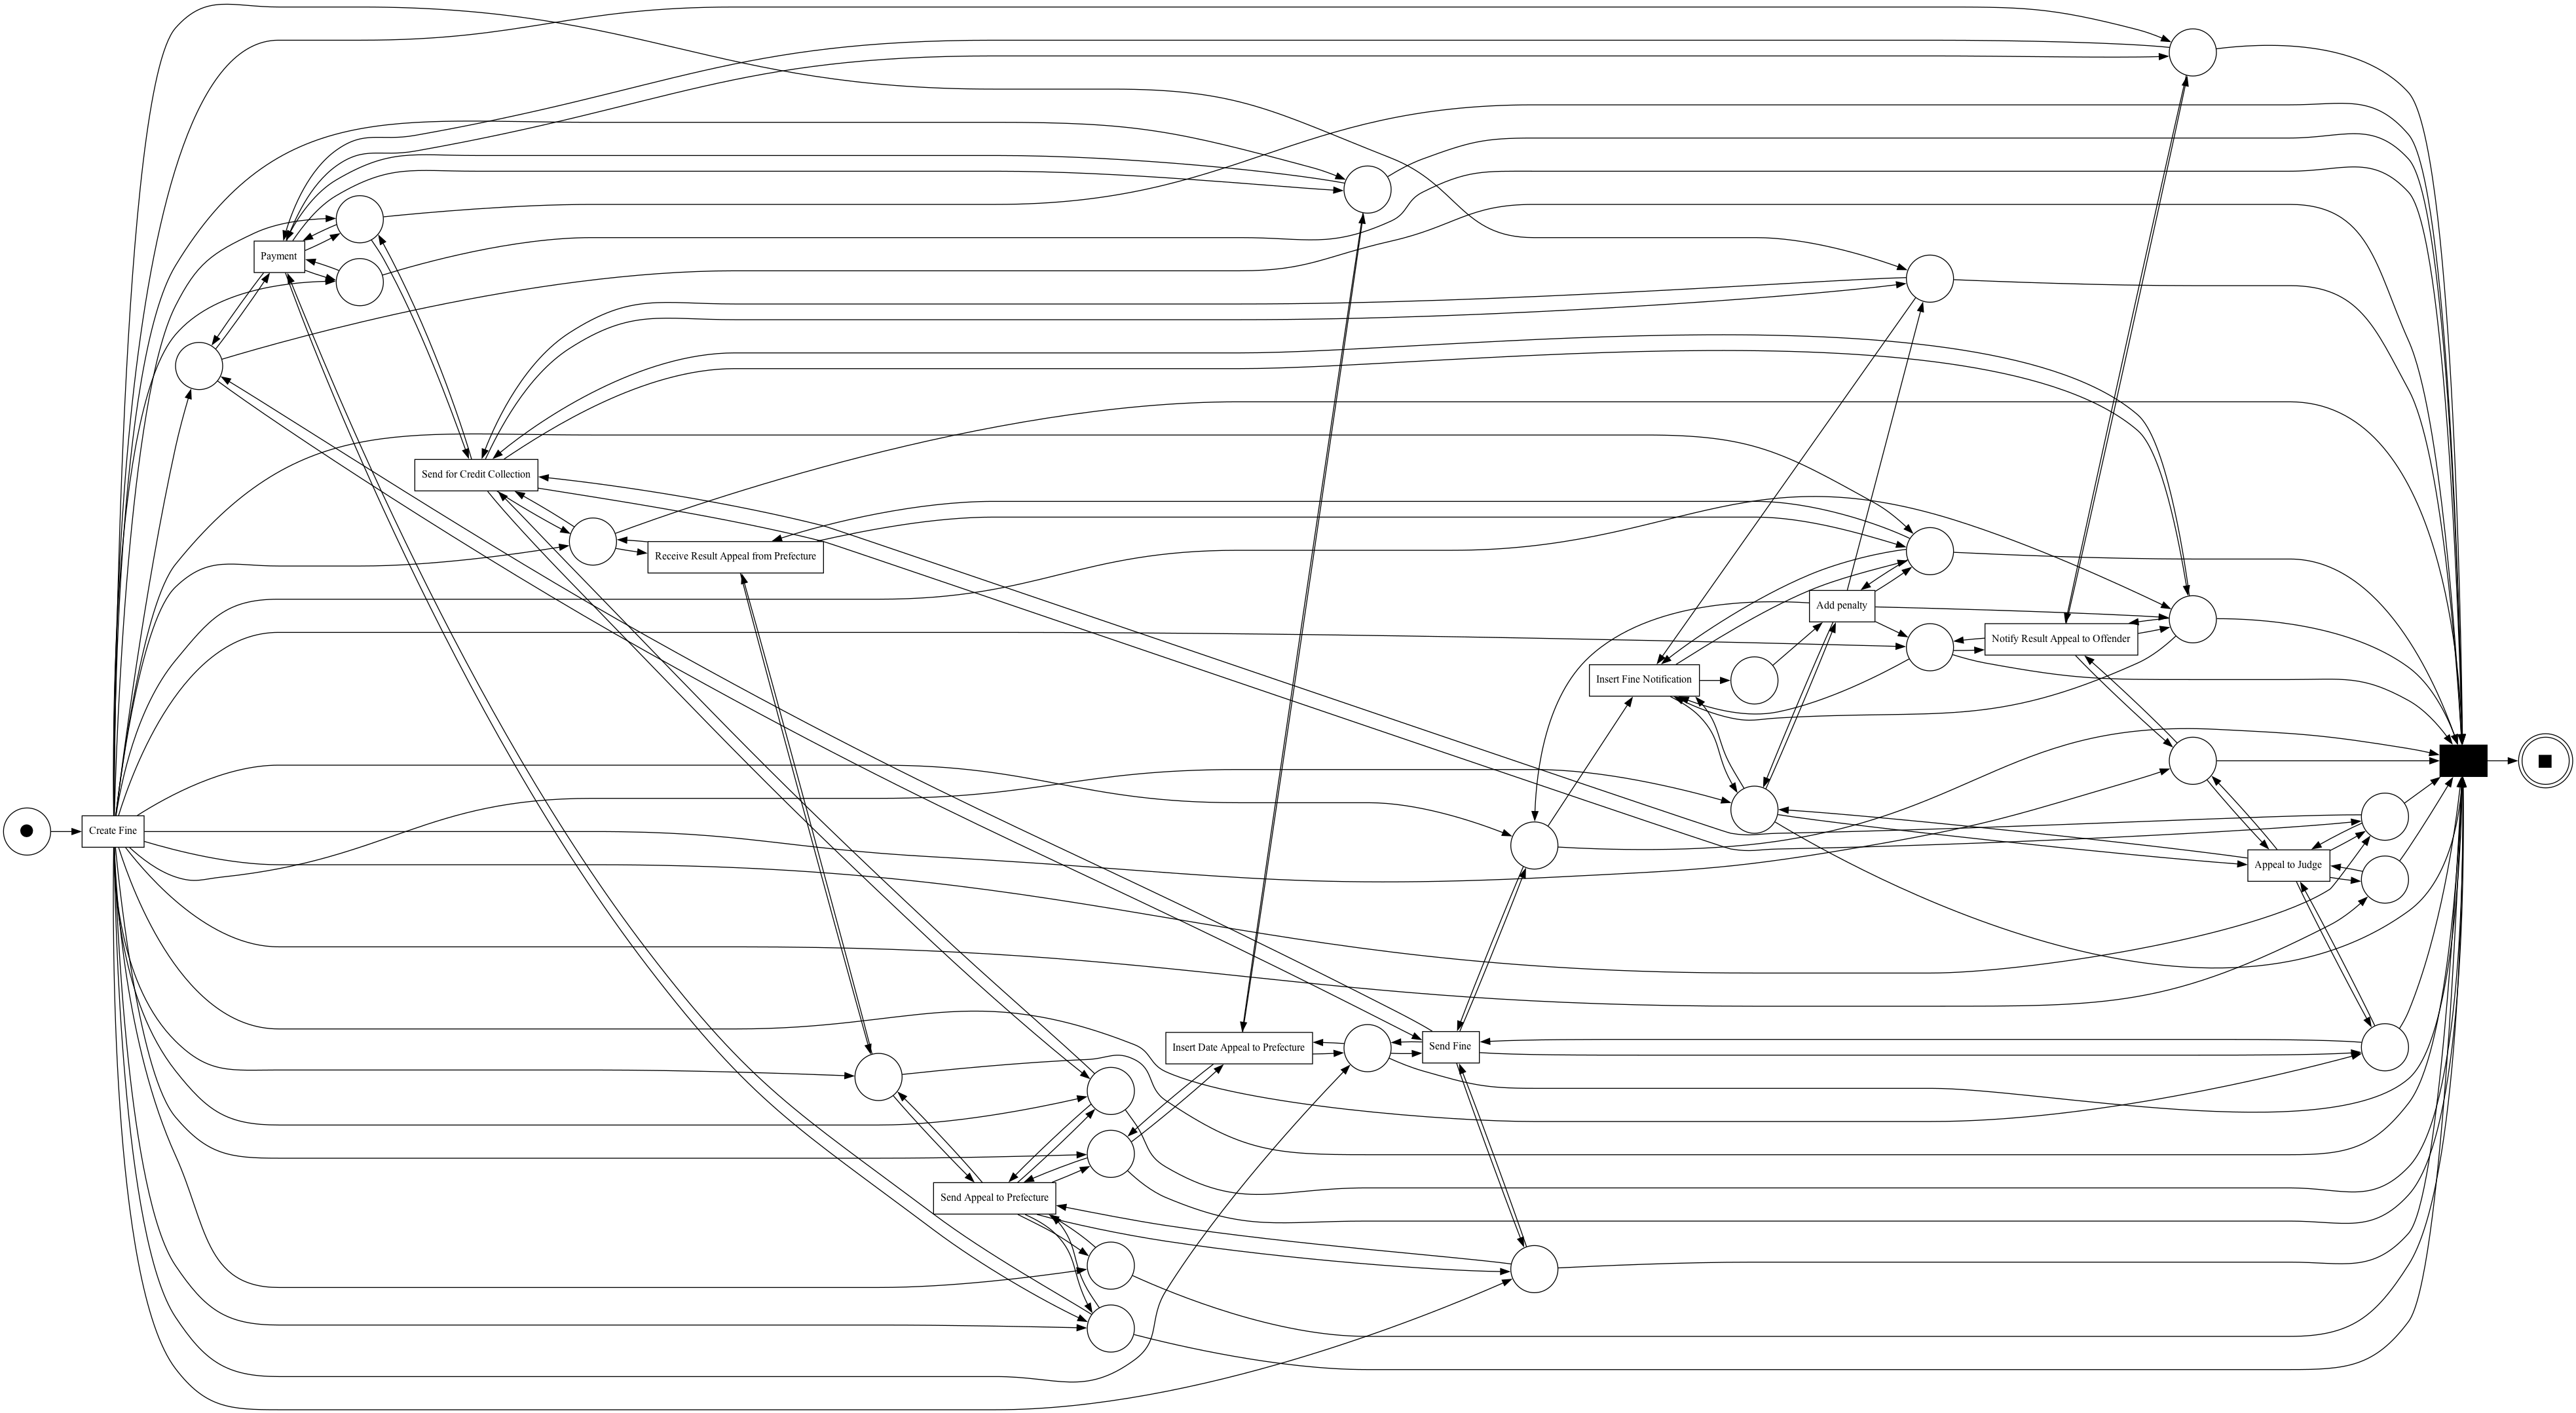

In [16]:
net_ilp, im_ilp, fm_ilp = pm4py.discover_petri_net_ilp(log_df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net_ilp, im_ilp, fm_ilp, format='png')

In [27]:
precision_tbr= pm4py.precision_token_based_replay(log_df,net_ilp,im_ilp,fm_ilp)
print("Precision: ",precision_tbr)
fitness_tbr= pm4py.fitness_token_based_replay(log_df,net_ilp,im_ilp,fm_ilp)
print("Recall: ",fitness_tbr)

simp = simplicity_evaluator.apply(net_ilp)
print("Simplicity: ",simp)

gen = generalization_evaluator.apply(log_df, net_ilp, im_ilp, fm_ilp)
print("Generalization: ",gen)

replaying log with TBR, completed traces :: 100%|██████████| 158/158 [00:00<00:00, 1169.44it/s]


Precision:  0.5573248320963973


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:01<00:00, 98.63it/s]


Recall:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Simplicity:  0.15447154471544716


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:01<00:00, 97.20it/s]


Generalization:  0.9660316426702553
